In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

Reading the dataset

In [115]:
data = pd.read_csv("Medical_Price_Dataset.csv")

Changing the values of sex, smoker, region columns into numbers so that we can use them to train our model.

In [116]:
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get)
data['smoker'] = data['smoker'].apply({'no':0, 'yes':1}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northeast':3, 'northwest':4}.get)

In [117]:
x=data.drop(['charges'],axis=1)
y=data.charges
x.head(5)


,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,4
4,32,0,28.880,0,0,4


In [118]:
y.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Dividing the dataset into train and test data by 5:1 ratio

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
y_train = pd.DataFrame({'charges': y_train})
y_test = pd.DataFrame({'charges': y_test})

Adding additional column with all values as one in input matrix

In [120]:
dummy = np.ones((1,len(x_train)))
x_train = np.vstack((dummy,x_train.T)).T
dummy1 = np.ones((1,len(x_test)))
x_test = np.vstack((dummy1,x_test.T)).T

Plotting age column with charges to see impact of age on medical charges

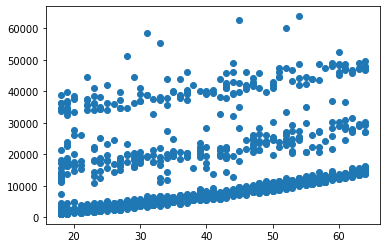

In [121]:
plt.scatter(x.age,y)
plt.show()

In [122]:
def model1(X, Y, alpha, iter):
    m = len(Y)
    cost_list = []
    col = X.shape[1]
    theta = np.zeros((col,1))
    print(iter)
    print(X.shape)
    print(Y.shape)
    for ind in range(iter):
        y_pred = np.dot(X, theta)
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        cost_list.append(cost)
        theta = theta -alpha*d_theta

        
    return theta, cost_list

In [123]:
theta_pred, costs = model1(x_train, y_train, 0.00005, 100)

100
(1070, 7)
(1070, 1)


Plotting cost function with iteration. We can see that with each iteration cost is coming down

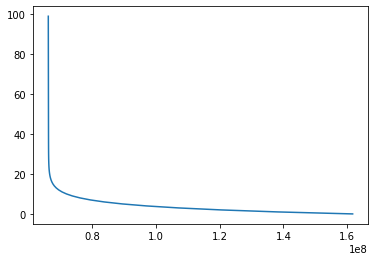

In [124]:
iteration = 100 
rng = np.arange(0, iteration)
plt.plot(costs,rng)
plt.show()

Predicted values of y

In [126]:
Y_pred = np.dot(x_test,theta_pred)
print(Y_pred[:5])

[[15490.06308296]
 [17077.44396186]
 [10954.41716036]
 [11932.83534808]
 [15825.20072903]]
